In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# 1. Завантаження даних і їх підготовка
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Розділення даних на навчальну та тестову вибірки (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизація даних
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# 2. Основна модель лінійної регресії
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [6]:
# Прогнозування на навчальній і тестовій вибірках
y_train_pred = linear_model.predict(X_train_scaled)
y_test_pred = linear_model.predict(X_test_scaled)

In [7]:
# Оцінка моделі
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [8]:
print(f"Training MSE: {mse_train}, R²: {r2_train}")
print(f"Testing MSE: {mse_test}, R²: {r2_test}")

Training MSE: 0.5179331255246699, R²: 0.6125511913966952
Testing MSE: 0.5558915986952442, R²: 0.575787706032451


In [9]:
# 3. Моделі з регуляризацією (Ridge та Lasso)
alpha_values = np.logspace(-3, 3, 7)
ridge_mse = []
lasso_mse = []

for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_scaled, y_train)
    y_pred_ridge = ridge_model.predict(X_test_scaled)
    ridge_mse.append(mean_squared_error(y_test, y_pred_ridge))
    
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_scaled, y_train)
    y_pred_lasso = lasso_model.predict(X_test_scaled)
    lasso_mse.append(mean_squared_error(y_test, y_pred_lasso))

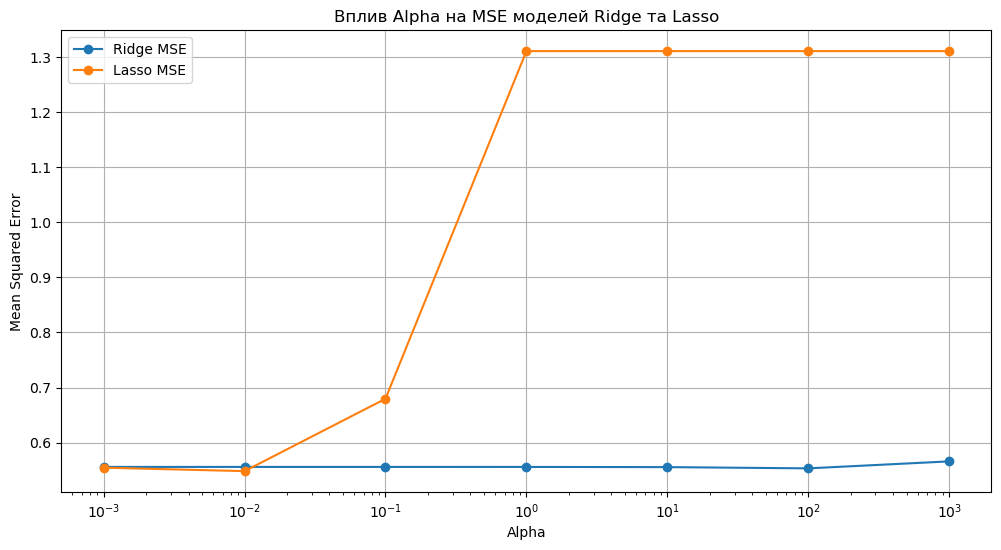

In [10]:
# 4. Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.semilogx(alpha_values, ridge_mse, label='Ridge MSE', marker='o')
plt.semilogx(alpha_values, lasso_mse, label='Lasso MSE', marker='o')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Вплив Alpha на MSE моделей Ridge та Lasso')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [22]:
X_scaled = scaler.fit_transform(X)

In [23]:
# 2. Пошук оптимальної кількості кластерів методом ліктя
wcss = []  # Within-cluster sum of squares (WCSS)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

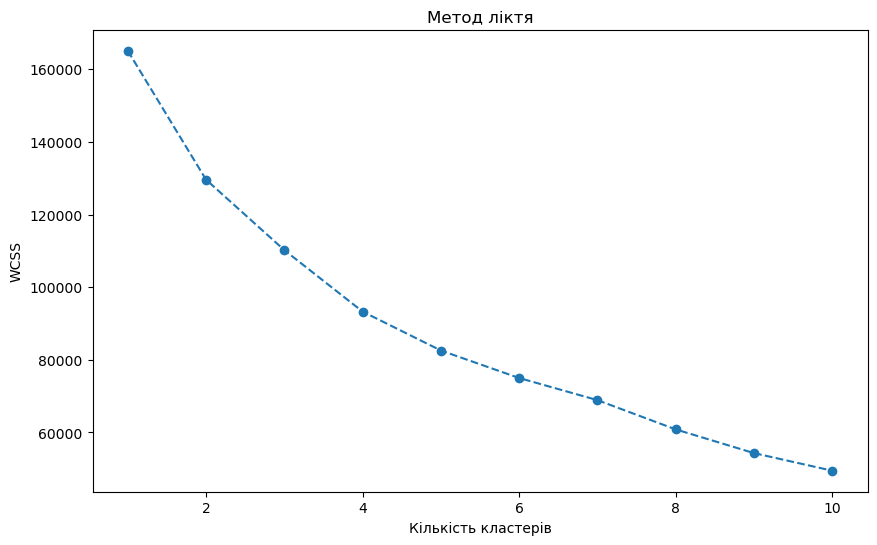

In [24]:
# 3. Використання методу силуетів для вибору кількості кластерів
# Візуалізація методу ліктя

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('WCSS')
plt.show()

In [25]:
# 3. Пошук оптимальної кількості кластерів методом силуетів
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

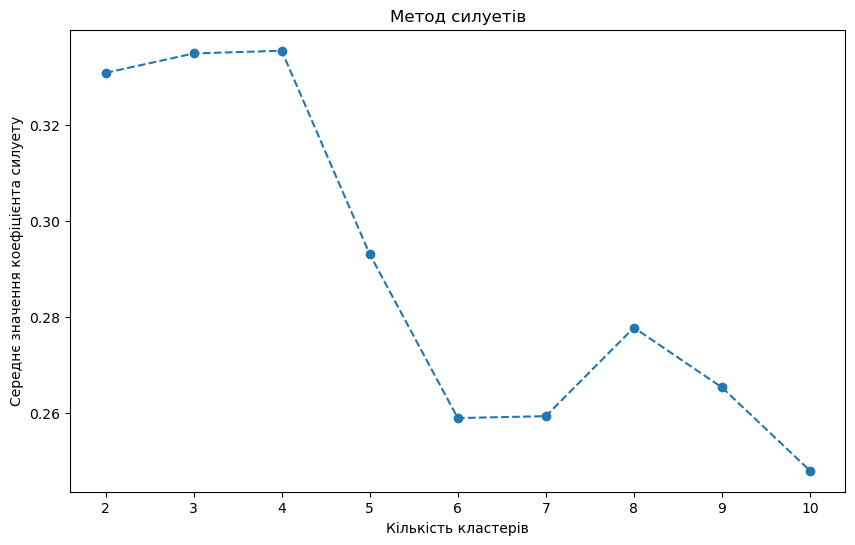

In [26]:
# Візуалізація методу силуетів
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Метод силуетів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Середнє значення коефіцієнта силуету')
plt.show()

In [ ]:
# 4. Виконання кластеризації з оптимальною кількістю кластерів (наприклад, 4 кластери)
optimal_clusters = 4  # Виберіть на основі методу ліктя або силуетів
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [ ]:
# 5. Візуалізація кластерів
plt.figure(figsize=(10, 6))

# Відобразимо перші дві ознаки для простоти візуалізації
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=50, c='red', label='Кластер 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=50, c='blue', label='Кластер 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=50, c='green', label='Кластер 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s=50, c='purple', label='Кластер 4')

# Візуалізація центроїдів кластерів
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Центроїди')
plt.title('Кластери California Housing')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.legend()
plt.show()